<a href="https://colab.research.google.com/github/ddfulaa/Machine-Learning-Notes/blob/main/Support_Vector_Machines_(SVMs)_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hoy me gustaría hablar sobre las support vector machines (SVM), que son uno de los algoritmos más famosos de machine learning  y que es útil tanto para problemas de clasificación, como para problemas de regresión. Las SVM son una herramienta útil en el aprendizaje automático porque permiten clasificar datos en grupos separados y definir los límites entre ellos.

Supongamos inicialmente que queremos hacer un modelo de clasificación de puntos que son linealmente separables, como por ejemplo la que muestra la siguiente imagen:


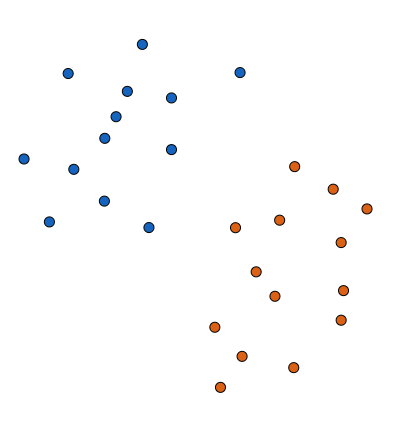

Si lo analizamos bien, hay una cantidad infinita de rectas con las que podemos hacer la clasificación.

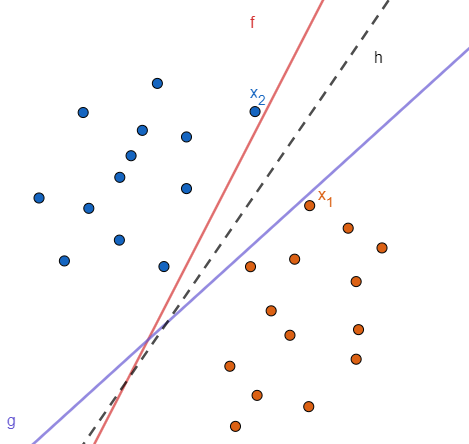

En este caso, la pregunta más natural que uno puede preguntarse es ¿cuál es la mejor recta que clasifica de mejor manera nuevos puntos que no pertenecen al conjunto de datos de entrenamiento?

Como es usual en machine learning, no hay una única respuesta y todo dependerá de la interpretación de nuestros datos, pero podemos dar un posible criterio de selección de la recta y es en el que se fundamentan las SVM. Para ello, analicemos la recta púrpura mostrada en la imagen de arriba. Como vemos el punto $x_1$ es muy cercano a ella. Supongamos que este punto puede venir de una medición de algún sensor en la realidad, por lo cual es un dato que es sensible y depende de la forma en la que se haya hecho la medición. Ahora pensemos que hemos diseñado nuestro clasificador tomando esta línea y que volvemos a hacer la medición del punto $x_1$ y que al pasarlo por el clasificador ahora nos dice que el punto es azul, aunque nosotros sabemos que debería ser naranja. Eso significa que el clasificador que diseñamos no es confiable y por tanto no es un buen modelo para nuestros datos. Podríamos caer en el mismo problema si consideramos la recta roja, pues está muy cerca del punto $x_2$.

Para que nuestro clasificador sea más confiable, nos gustaría una recta como la delineada que se muestra en la imagen, pues está lo suficientemente alejada de los puntos de cada clase, como para decir que tenemos cierto margen  de maniobra como para evitar que los errores en las mediciones de los puntos hagan que la clasificación sea hecha de manera incorrecta. En otras palabras, dicho margen hace que nuestro clasificador sea más confiable. 
Así, la idea detrás de las SVM es elegir la recta que divida a los dos grupos de puntos y que tenga la propiedad de que cada punto está lo más alejado posible de la recta.

### Formalizando nuestro problema
Una vez comprendida la idea, debemos formalizar más sus conceptos. Vamos a trabajar en espacios de cualquier dimensión, por lo que en lugar de rectas, trabajaremos con hiperplanos. Consideremos la siguiente imagen para tener una noción geométrica de qué es lo que se quiere.

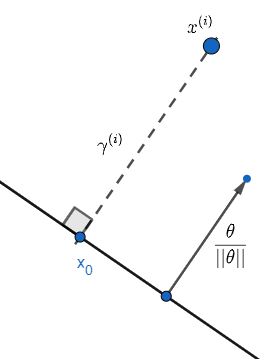

Nos gustaría que cada punto esté tan alejado del hiperplano separador tanto como sea posible, es decir que la distancia o margen $\gamma^{(i)}$ de un punto $x^{(i)}$ al hiperplano sea máxima. Recordemos que la ecuación del hiperplano está dada por $\theta^Tx +\theta_0 = 0$ y que existe un punto $x_0$ en el hiperplano cuya distancia al punto $x^{(i)}$ es mínima y que define una recta perpendicular al hiperplano. Podría decirse que la función $f(x)= \theta^Tx +\theta_0$ define una manera de puntuar los puntos, donde el puntaje es 0 si un punto está sobre el hiperplano, 1 si está por encima de él y -1 si está por debajo de él. En la imagen de arriba, se muestra por ejemplo, que el punto $x^{(i)}$ está sobre el hiperplano, es decir que $y^{(i)}=1$. Como el vector $\dfrac{\theta}{||\theta ||}$ es perpendicular al hiperplano, sabemos que la siguiente igualdad se cumple:
$$x^{(i)} = x_0 + \gamma^{(i)}\dfrac{\theta}{||\theta ||},$$
o de manera equivalente,
$$x_0 = x^{(i)} -  \gamma^{(i)}\dfrac{\theta}{||\theta ||}.$$
Adicionalmente como sabemos que el punto $x_0$ está sobre el hiperplano, se cumple que $$\theta^T x_0 + \theta_0 = 0,$$
por lo que
$$\theta^T \left( x^{(i)} -  \gamma^{(i)}\dfrac{\theta}{||\theta ||}\right) + \theta_0 = 0.$$
Tenemos entonces que
$$\theta^T x^{(i)} -  \gamma^{(i)}\dfrac{\theta^T\theta}{||\theta ||} + \theta_0 = 0$$
y como $||\theta||^2 = \theta^T \theta$, obtenemos que
$$\theta^T x^{(i)} -  \gamma^{(i)}||\theta || + \theta_0 = 0.$$
Despejando $\gamma^{(i)}$ llegamos a que
$$\gamma^{(i)} = \dfrac{\theta^T x^{(i)} + \theta_0}{||\theta||}.$$
Para el caso donde $y^{(i)}=-1$, se parte de que $$x^{(i)} = x_0 - \gamma^{(i)}\dfrac{\theta}{||\theta||}$$ y se llega a que 
$$\gamma^{(i)} = -\dfrac{\theta^T x^{(i)} + \theta_0}{||\theta||}.$$
Es decir que en general,
$$\gamma^{(i)} = y^{(i)}\dfrac{\theta^T x^{(i)} + \theta_0}{||\theta||}.$$

Hemos definido el margen para cada punto del conjunto de datos y queremos que cada uno de ellos sea tan grande como sea posible teniendo en consideración a todos los demás puntos del conjunto de datos. En particular, nos gustaría que los puntos que están más cerca del hiperplano estén a la mayor distancia posible de él, después de todo, como mostró nuestro ejemplo al inicio, estos son los los puntos que hacen que nuestro clasificador pueda ser poco confiable. El problema es que no sabemos cuáles son esos puntos, pero lo que sí sabemos es su distancia hasta el hiperplano, por lo que podemos definir nuestro problema como *maximizar la distancia de los puntos que se encuentran más cerca del hiperplano*. Aunque no sepamos cuáles son esos puntos, sí sabemos cuál es su distancia, que puede ser definida como $$\gamma =\min_{\forall i} \gamma^{(i)}$$ y nuestro problema es entonces maximizar $\gamma$. Por definición entonces $\gamma^{(i)} = y^{(i)}\dfrac{\theta^T x^{(i)} + \theta_0}{||\theta||} \geq \gamma$ para todo $i$ y como tampoco sabemos los parámetros del hiperplano $\theta$ y $\theta_0$, la formulación de nuestro problema sería el siguiente:
$$\max_{\theta, \theta_0, \gamma} \gamma$$
$$\text{sujeto a }  y^{(i)}\dfrac{\theta^T x^{(i)} + \theta_0}{||\theta||} \geq \gamma \text{  } \forall i.$$


No obstante, la formulación tiene un pequeño inconveniente. Recordemos que en la ecuación del hiperplano $\theta^T x + \theta_0 = 0$, tanto $\theta$ como $\theta_0$ no son únicos, sino que nos sirven $c \theta$ y $c \theta_0$, para cualquier valor de $c>0$. Esto hace que nuestro problema de maximización no tenga solución única y aunque esto no sea un inconveniente de manera teórica, de manera práctica sí lo es, ya que el hiperplano en sí, si es único. Es ideal, como siempre, que los valores de $\theta$ sean lo más pequeños posibles (por regularización) y como queremos que $\gamma$ sea lo más grande posible, tenemos una relación inversa entre $\gamma$ y $\theta$. Este tipo de relaciones se expresa como $\gamma ||\theta|| = c$, para algún $c>0$. En particular podemos definir $c=1$, por lo que $\gamma ||\theta|| = 1$. Al incluir esta ecuación en nuestro problema, pasamos a tener únicamente 2 parámetros:
$$\max_{\theta, \theta_0} \dfrac{1}{||\theta||}$$
$$\text{sujeto a }  y^{(i)} (\theta^T x^{(i)} + \theta_0) \geq 1 \text{  } \forall i.$$
Pero, ¿cómo se resuelve un problema de este tipo? Nos gustaría encontrar una formulación que nos permita usar alguna librería de optimización que ya tenga incluido un algoritmo que nos resuelva el problema. Afortunadamente, existe una manera equivalente a este problema que está incluida en muchos paquetes de optimización (programa cuadrático con restricciones lineales):
$$\min_{\theta, \theta_0} \dfrac{1}{2} ||\theta||^2$$
$$\text{sujeto a }  y^{(i)} (\theta^T x^{(i)} + \theta_0) \geq 1 \text{  } \forall i.$$
*Observación:* No es la única forma de resolver este problema y de hecho, existen formulaciones más eficientes.

*Observación:* Si pensamos detenidamente lo que hicimos anteriormente, siempre habrá al menos un punto por cada grupo, que tenga a $1/||\theta||$ como distancia al hiperplano. Pensémoslo en el siguiente sentido, tomemos el punto azul más cercano a la recta en la imagen de arriba. Como queremos maximizar su distancia a la recta, deberíamos alejar la recta de él. Pero al hacer esto, lo estamos acercando más a un punto naranja. De manera recíproca, si lo alejamos más la recta de los puntos naranja, la acercamos más a los puntos azules. La manera óptima de resolver esto es elegir una recta que tenga la misma distancia a los puntos azules que a los puntos naranja. A tales puntos se les suele llamar vectores de soporte. Esto es porque para cada grupo existe un hiperplano paralelo al encontrado, en el cual se encuentran estos vectores y que también separan a los dos grupos, pero esta vez con distancia mínima. Estos hiperplanos se llaman hiperplanos soporte.

*Observación:* Aunque en la explicación que acabamos de ver se definió el margen como la distancia máxima entre el hiperplano y los puntos más cercanos, hay otras personas que definen el margen como la distancia entre los hiperplanos que soportan a cada grupo.





### Otra forma de interpretar el problema
Recordemos que habíamos mencionado anteriormente que la función $f(x)= \theta^Tx +\theta_0$ nos permitía puntuar los $x$. Pero esto estaba definido para el caso cuando $y^{(i)}=1$. De manera general podemos definir esta función de puntuación como $f(x^{(i)},y^{(i)})= y^{(i)}(\theta^Tx^{(i)} +\theta_0)$. Es decir, que para asegurarnos de que cada punto esté bien clasificado, debemos asignarle una puntuación mayor a 1. Teniendo esto en cuenta podemos reescribir nuestro problema como:
$$\min_{\theta, \theta_0} \dfrac{1}{2} ||\theta||^2$$
$$\text{sujeto a }  f(x^{(i)},y^{(i)}) \geq 1 \text{  } \forall i.$$
Es decir que debemos encontrar el valor mínimo para los parámetros del hiperplano, de manera que podamos puntuar a cada punto con un valor mayor que 1.


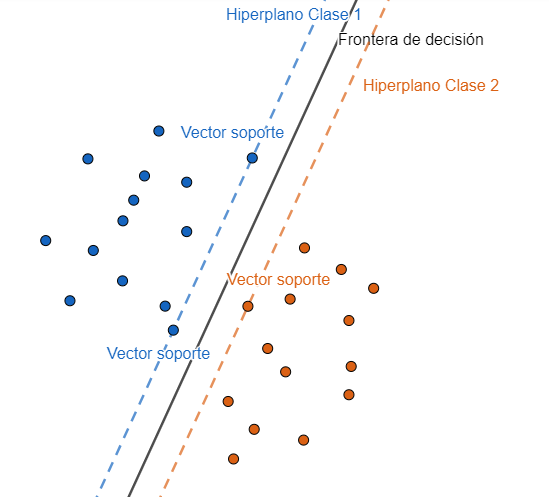

## ¿Qué pasa si mis datos no son linealmente separables?
Hemos visto cómo resolver el problema de la elección de la recta cuando los datos son linealmente separables, pero la vida nunca es tan simple, así que veamos ahora cómo modificar  las ideas del caso mostrado antes para resolver el problema cuando los datos no son linealmente separables. La idea tampoco es nada del otro mundo. Si recordamos la interpretación con la función de puntuación, queremos minimizar los valores de los parámetros del hiperplano de manera tal que podamos puntuar a cada pareja $(x^{(i)},y^{(i)})$ con un valor mayor a 1. Esto será imposible si los datos no son linealmente separables. Lo que podemos hacer es, por cada punto $(x^{(i)},y^{(i)})$, agregar otro parámetro $\xi_i$ que nos dé cierto grado de libertad para evaluar las puntuaciones, de forma que:
* Podamos obtener certeza sobre la mayoría de los puntos (probablemente los puntos más alejados de la frontera de decisión). Es decir que podemos asignar un puntaje mayor o igual que 1. En este caso $\xi_i = 0$.
* Cuando no haya mucha certeza sobre algún punto, podamos asignar un puntaje menor que 1, incluso con puntajes negativos (en el caso en el que un punto se aleja demasiado de su grupo).
* Cada $\xi_i$ debe ser tan pequeño como sea posible, pues no queremos que la solución del problema se aleje de nuestra solución ideal.
Una manera de lograr esto es definiendo el problema de minimización como:

$$\min_{\theta, \theta_0, \xi} \dfrac{1}{2} ||\theta||^2 + C \sum_{i=1}^n \xi_i $$
$$\text{sujeto a }  y^{(i)}({\theta^T x^{(i)} + \theta_0}) \geq 1-\xi_i \text{ y } \xi_i\geq 0 \text{ para todo } i .$$

En optimización a esto se le conoce como relajar o suavizar el problema agregando variables de holgura (*slack variables*). El hiperparámetro $C$ se puede interpretar como qué tan reacios estamos a alejarnos de la solución ideal agregando las variables de holgura, pues si $C \gg 1$, al estar en un problema de minimización, estaremos dando valores más pequeños de los $\xi_i$, haciendo que estos sean irrelevantes y que volvamos al problema original. De manera recíproca, si $C$ es muy cercano a 0, estaremos "*premiando*" valores de $\xi_i$ más grandes, lo que nos aleja del caso ideal.




Podemos reescribir el problema de minimización incluyendo las condiciones dentro de la función de objetivo. Para esto definamos  $\xi_i = \max(0,1-y^{(i)}({\theta^T x^{(i)} + \theta_0}))$, que por notación se escribirá $\xi_i = (1-y^{(i)}({\theta^T x^{(i)} + \theta_0}))^+ $. De esta manera, si la puntuación de alguna pareja es mayor o igual que 1, $\xi_i = 0$ y en caso de ser menor $\xi_i = 1- \text{puntuación}$. De esta forma, tenemos la siguiente formulación equivalente:
$$\min_{\theta,\theta_0,C} \dfrac{1}{2}||\theta||^2 + C \sum_{i=1}^n (1-y^{(i)}({\theta^T x^{(i)} + \theta_0}))^+.$$
Si dividimos por $C = \frac{1}{\lambda}$, obtenemos 
$$\min_{\theta,\theta_0,\lambda } \sum_{i=1}^n (1-y^{(i)}({\theta^T x^{(i)} + \theta_0}))^+ + \dfrac{\lambda}{2}||\theta||^2 .$$
Este problema puede verse como un problema cuya función de pérdida es la de Hinge con regularización $L_2$, donde se penalizan las prediciones incorrectas y los pesos del modelo son pequeños, asegurando que tengan buen comportamiento.

Existen algoritmos para encontrar los valores óptimos usando esta formulación. Al tener una función *máximo*, no podemos definir el gradiente de dicha función, pero sí se pueden usar métodos de subgradiente.

### Optimización, dualidad de Lagrange y el truco del kernel

A pesar de la formulación anterior, podría existir una manera más óptima de resolverlo que se obtiene usando el concepto de dualidad en optimización. 

La idea básica detrás de la dualidad es que para cualquier problema de optimización, existe otro problema llamado "problema dual" que está estrechamente relacionado con el problema original o "problema primal". Este problema dual tiene la propiedad de que su solución proporciona una cota inferior en el valor óptimo del problema original.

En otras palabras, si podemos resolver el problema dual y encontrar su solución óptima, podemos usar esa solución para estimar el valor óptimo del problema original. Esto es útil porque a veces es más fácil resolver el problema dual que el problema original.

### Dualidad de Lagrange
Supongamos que tenemos el siguiente problema de optimización con restricciones
$$\min_{\theta \in \mathbb{R}^d} J(\theta)$$
$$\text{tal que } c_k(\theta) \leq 0 \text{ para } k=1,2,\cdots,K$$
donde $J(\theta)$ es la función objetivo y cada $c_k(\theta)$ es una restricción. 

Queremos ahora convertirlo en un problema sin restricciones, por lo que podríamos pensar en una función objetivo como la siguiente $$ \mathcal{L(\theta,\lambda)} = J(\theta) + \sum_{k=1}^K \lambda_k c_k(\theta)$$
para algún vector de números positivos de multiplicadores de Lagrange $\lambda \in [0, ∞)^k$. ¿Qué condiciones deberán cumplirse para que obtengamos un problema equivalente, pero usando el lagrangiano?

* El término $\lambda_k c_k(\theta)$ en el lagrangiano actúa como un término de penalización en la función objetivo original $J(\theta)$ para cada restricción $c_k(\theta)$. Si $\lambda_k$ es positivo, entonces el término $\lambda_k c_k(\theta)$ será positivo o negativo dependiendo del signo de $c_k(\theta)$. Esto significa que si $c_k(\theta)$ es grande y positivo, entonces el lagrangiano será grande, y por lo tanto la función objetivo $J(\theta)$ será penalizada. En otras palabras, valores grandes de $c_k(\theta)$ se penalizan por el término de penalización en la función objetivo, lo que conduce a minimizar el valor de $c_k(\theta)$. Por otro lado si $c_k(\theta)$ es negativo, no se penalizará los valores de $c_k(\theta)$ en la función objetivo $J(\theta)$.

* Si $\lambda_k$ es lo suficientemente grande, entonces el término $\lambda_k c_k(\theta)$ será también lo suficientemente grande, lo que hace que la función objetivo $J(\theta)$ sea más costosa de optimizar si se viola la restricción $c_k(\theta) > 0$. En otras palabras, la optimización de $J(\theta)$ se vuelve tan costosa que la solución óptima se encuentra en $\theta$ donde la restricción se cumple, es decir, $c_k(\theta) \leq 0$. Por lo tanto, para valores lo suficientemente grandes de $\lambda_k$, ninguno de los $c_k(\theta)$ puede ser positivo en la solución óptima.

Es decir, que deberíamos intentar maximizar los valores de $\lambda_k$ para que se cumplan las restricciones. Así nos gustaría tener
$$\mathcal{P}(\theta) = \max_{\lambda\geq 0} \mathcal{L}(\theta,\lambda).$$

Pero nuestro problema principal es uno de minimización, por lo que tendríamos entonces que resolver el problema 
$$\min_{\theta} \mathcal{P}(\theta) = \min_{\theta} \max_{\lambda\geq 0} \mathcal{L}(\theta,\lambda).$$

Esta se conoce como la forma primal del problema de optimización. Pero podríamos preguntarnos, ¿por qué no calcular primero el mínimo de $\theta$ y luego el máximo de los $\lambda$? Esto es, resolver el problema:
$$ \max_{\lambda\geq 0} \mathcal{D}(\lambda) = \max_{\lambda\geq 0} \min_{\theta} \mathcal{L}(\theta,\lambda).$$
A esta se le conoce como la formulación dual de Lagrange del problema primal de optimización. La teoría de la optimización nos dice que 
$$\max_{\lambda\geq 0} \mathcal{D}(\lambda) \leq \min_{\theta} \mathcal{P}(\theta),$$
es decir que la solución del problema dual siempre es una cota inferior para el problema primal.
Hay casos más interesantes donde se tiene la igualdad, por lo que resolver el problema dual es equivalente a resolver el primal y es precisamente el caso para las SVM.






De esta manera, si expresamos el lagrangiano del problema 
$$\min_{\theta, \theta_0, \xi} \dfrac{1}{2} ||\theta||^2 + C \sum_{i=1}^n \xi_i $$
$$\text{sujeto a }  y^{(i)}({\theta^T x^{(i)} + \theta_0}) \geq 1-\xi_i \text{ y } \xi_i\geq 0 \text{ para todo } i,$$
obtenemos que
$$\mathcal{L}(\theta,\theta_0,\alpha,\mu,C) = \dfrac{1}{2} ||\theta||^2 + C \sum_{i=1}^n \xi_i - \sum_{i=1}^n \alpha_i [y^{(i)}(\theta^T x^{(i)}+\theta_0) - 1 + \xi_i] - \sum_{i=1}^n \mu_i \xi_i.$$
*Nota:* Recordemos que hay que expresar las condiciones de forma que $c_i \leq 0.$

Como la idea es resolver el problema dual, queremos hallar el mínimo de $\mathcal{D}(\theta,\theta_0,\xi)$. Esto lo podemos hacer calculando las derivadas parciales e igualando a cero, donde se obtiene que:
$$\dfrac{\partial \mathcal{L}}{\partial \theta} = \theta -\sum_{i=1}^n \alpha_i y^{(i)} x^{(i)} =0 ⇒ \theta =\sum_{i=1}^n \alpha_i y^{(i)} x^{(i)}$$
$$\dfrac{\partial \mathcal{L}}{\partial \theta_0} = -\sum_{i=1}^n \alpha_i y^{(i)} = 0$$
$$\dfrac{\partial \mathcal{L}}{\partial \xi_i} = C - \alpha_i - \mu_i = 0 ⇒ C = \alpha_i + \mu_i.$$
Por lo que al reemplazar estas respuestas se obtiene que
$$\min_{\theta,\theta_0,\xi} \mathcal{D}(\theta,\theta_0,\xi,\alpha,C) = \dfrac{1}{2} \left(\sum_{i=1}^n \alpha_i y^{(i)} x^{(i)} \right)^T\left( \sum_{i=1}^n \alpha_i y^{(i)} x^{(i)}\right) - \sum_{i=1}^n \alpha_i \left[y^{(i)}\left(\left(\sum_{j=1}^n \alpha_j y^{(j)} x^{(j)} \right)^T x^{(i)} \right) \right] + \sum_{i=1}^n \alpha_i.$$
*Nota:* Se cancelaron los términos con $\xi_i$ (pues $C=\alpha_i + \mu_i)$ y el término que contenía a $\theta_0$ (pues quedaba en una sumatoria $\sum_i \alpha_i y^{(i)} \theta_0 = \theta_0  \sum_i \alpha_i y^{(i)}  = \theta_0 *0 = 0$).
Al simplificar se obtiene que
$$\min_{\theta,\theta_0,\xi} \mathcal{D}(\theta,\theta_0,\xi,\alpha,C) = \sum_{i=1}^n \alpha_i - \dfrac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)} (x^{(i)})^T x^{(j)},$$
sujeto a $\sum_i \alpha_i y^{(i)} = 0$ y $C>\lambda_i \geq 0$ para todo $i$.
De esta manera el problema dual es 
$$\max_{\alpha} \sum_{i=1}^n \alpha_i - \dfrac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)} (x^{(i)})^T x^{(j)},$$
sujeto a $\sum_i \alpha_i y^{(i)} = 0$ y $C\geq\alpha_i \geq 0$ para todo $i$.

*Observación:* Este es un problema cuadrático (en términos de $\alpha$), con $n$ variables (hay $n$ $\alpha_i$'s) y en la que la función objetivo contiene el producto interno entre $x^{(i)}$ y $x^{(j)}$. Recordemos que $n$ es el número de datos de entrenamiento. Por otra parte, el problema original consistía de $d+1$ variables (los $\theta_i$), donde $d$ es el número de características en los datos. Por lo tanto, es más conveniente resolver el problema dual si hay un mayor número de características que de datos ($d\gg n$), mientras que si sucede lo contrario ($n\gg d$), es mejor resolver el original.

*Observación:* Para incrementar la complejidad del modelo, se deben aumentar el número de características.

*Observación:* Aunque el problema dual sea uno cuadrático, existe un algoritmo mejor para obtener su solución: *Sequential Minimal Optimization*.

*Observación:* Una pregunta que surge naturalmente es, una vez obtenidos los valores de los $\alpha_i$, cómo se obtienen los parámetros del hiperplano que define la frontera de decisión. La respuesta a esto está en el momento que calculamos la derivada del lagrangiano, pues $\theta =\sum_{i=1}^n \alpha_i y^{(i)} x^{(i)}$. 

*Observación:* Para obtener  $\theta_0$ debemos tener en cuenta las retricciones complementarias. Como en el primal se tenía que $\alpha_i\geq 0$ y $c_i(\theta)\leq 0$, en el dual se debe cumplir que $\alpha_i c_i (\theta)=0$. De esta forma, para algún $i$ donde $\alpha_i \neq 0$, se debe cumplir que $1-y^{(i)}(\theta^T x^{(i)} + \theta_0) = 0$. Como $y^{(i)}$ es su propio inverso $y^{(i)} - (\theta^T x^{(i)} + \theta_0) = 0$ y $\theta_0 = y^{(i)} - \theta^T x^{(i)}$.

*Observación:* La predicción para un dato de entrada $x'$ se realiza calculando $y' = \theta^T x' + \theta_0$.

*Observación:* Curiosamente la mayoría de los valores de $\alpha_i$ al resolver el problema de optimización es 0 y los únicos no nulos son los correspondientes a los vectores soporte. 

### El truco del kernel y las SVM
Pudimos expresar nuestro problema como uno que involucra del producto interno de dos vectores y no solo eso, sino que sólamente depende de ese producto interno, por lo que la introducción de kernels en este problema es lo más natural que podríamos hacer. Es decir que podemos generalizar las SVM para obtener fronteras de decisión que sean más complejas.  El problema ahora estaría dado por
$$\max_{\alpha} \sum_{i=1}^n \alpha_i - \dfrac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)} k(x^{(i)},x^{(j)}),$$
sujeto a $\sum_i \alpha_i y^{(i)} = 0$ y $C>\alpha_i \geq 0$ para todo $i$ y donde $k(\cdot,\cdot)$ es la función de kernel que nos definirá la frontera de decisión. Una vez calculados los valores de $\alpha$, hacemos las predicciones de un nuevo dato de entrada $x'$ calculando $y' = \theta^T \phi(x') + \theta_0$. Pero recordemos que $\theta =\sum_{i=1}^n \alpha_i y^{(i)} \phi(x^{(i)})$  y que dependiendo del kernel que elijamos, probablemente sea muy difícil o imposible calcular $\phi(x^{(i)})$. No obstante, es posible calcular $\theta^T \phi(x')$, pues 
$$\theta^T \phi(x') = \sum_{i=1}^n \alpha_i y^{(i)} \phi(x^{(i)})^T \phi (x') = \sum_{i=1}^n \alpha_i y^{(i)} k(x^{(i)},x').$$
De la misma manera que antes, el valor de $\theta_0$ viene de las restricciones complementarias y se calcula con $$\theta_0 = y^{(j)} - \theta^T \phi(x^{(j)}) = y^{(j)} - \sum_{i=1}^n \alpha_i y^{(i)} k(x^{(i)},x^{(j)}),$$ para algún $j$ con $\alpha_j \neq 0$.

### Regresión con las SVM
También es posible hacer regresión usando ideas similares a las presentadas aquí, pero en lugar de intentar encontrar un "tubo" que separe a nuestros grupos de datos con ancho máximo, queremos encontrar un "tubo" con ancho mínimo, de manera que todos los datos estén dentro del tubo.